In [12]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from typing import List, Tuple, Union
from dataclasses import dataclass
from scipy.spatial import distance

In [13]:
rad_measure = pd.read_csv("../data/GT/result_5points.csv")
correct_list = []
correct_list.append([1.5,1.5,50.0])
correct_list.append([8.5,1.5,80.0])
correct_list.append([1.5,8.5,30.0])
correct_list.append([8.5,8.5,70.0])
correct_list.append([4.5,4.5,90.0])
print(correct_list)
x = rad_measure['x']
y = rad_measure['y']
attenuation = 0.10177304964539008

[[1.0, 1.0, 50.0], [9.0, 1.0, 80.0], [1.0, 9.0, 30.0], [9.0, 9.0, 70.0], [5.0, 5.0, 90.0]]


In [14]:
def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [15]:
def calculate_nearest_i(g, correct_list):
    nearest_i = []
    G = g*g
    d=10/g
    for l in correct_list:
        temp_i = []
        temp_i.append((0,100000))
        for i in range(G):
            temp_x = (i % g)*d + d/2
            temp_y = (i//g)*d + d/2
            temp_dis = calculate_distance(l[0],l[1],temp_x,temp_y)
            if temp_dis < temp_i[0][1]:
                temp_i.clear()
                temp_i.append((i, temp_dis))
            elif temp_dis == temp_i[0][1]:
                temp_i.append((i, temp_dis))
            else:
                pass

        nearest_i.append(temp_i)

    return nearest_i

In [16]:
def calculate_L1(t,q):
    sum = 0
    for i in range(len(q)):
        sum += (t[i]-q[i])

    return sum

In [17]:
rad =[]
for i in range(len(rad_measure)):
    temp_rad = 0
    s_pos = rad_measure['shield'][i]
    for l in correct_list:
        dis = calculate_distance(x[i],y[i],l[0],l[1])
        if s_pos == 'A':
            if x[i] < l[0] and y[i] < l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'B':
            if x[i] < l[0] and y[i] > l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'C':
            if x[i] > l[0] and y[i] > l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)
        elif s_pos == 'D':
            if x[i] > l[0] and y[i] < l[1]:
                temp_rad += l[2] / (dis**2) * attenuation
            else:
                temp_rad += l[2] / (dis**2)

    rad.append(temp_rad)

ZeroDivisionError: float division by zero

In [18]:
rad_ns =[]
x_ns =[]
y_ns =[]
for i in range(len(rad_measure)):
    if i % 4 == 0:
        x_ns.append(rad_measure['x'][i])
        y_ns.append(rad_measure['y'][i])
        temp_rad = 0
        s_pos = rad_measure['shield'][i]
        for l in correct_list:
            dis = calculate_distance(x[i],y[i],l[0],l[1])
            temp_rad += l[2] / (dis**2)

        rad_ns.append(temp_rad)

ZeroDivisionError: float division by zero

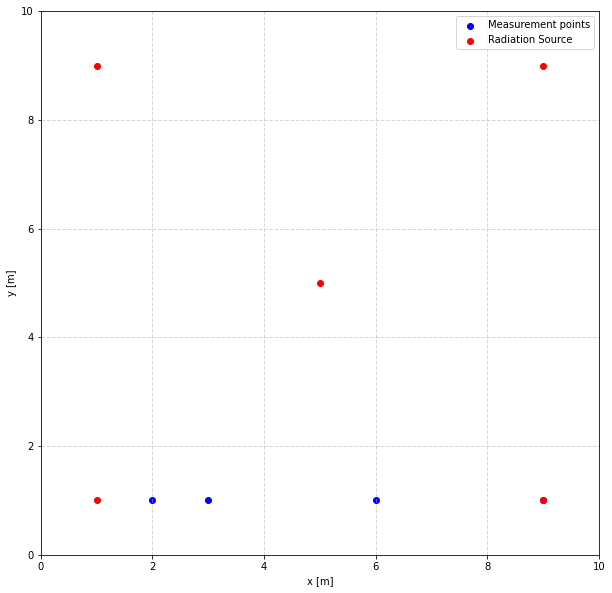

In [19]:
plt.figure(figsize=(10, 10))

plt.scatter(x_ns, y_ns,color='blue',label='Measurement points')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.xlim(0,10)
plt.ylim(0,10)
i = 0
for l in correct_list:
    if i == 0:
        plt.scatter(l[0],l[1], color='red', label='Radiation Source')
    else:
        plt.scatter(l[0],l[1], color='red')
    i += 1

plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.legend()
plt.show()

# MLE

In [6]:
#計測値
b = np.array(rad)
#grid 20*20
g = 40
d = 10/g
G = g*g
q_max = 100
q_init = 1/q_max
q = np.array([q_init]*G)
q = q.astype(float)

NameError: name 'rad' is not defined